# Illustrates the use of the WR (Weather Regime) class

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

### import the development version of paleopy

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from paleopy import proxy
from paleopy import analogs
from paleopy import ensemble

In [4]:
djsons = '../jsons/'
pjsons = '../jsons/proxies'

### instantiates a proxy with the required parameters

In [5]:
p = proxy(sitename='Rarotonga', \
          lon = -159.82, \
          lat = -21.23, \
          djsons = djsons, \
          pjsons = pjsons, \
          pfname = 'Rarotonga.json', \
          dataset = 'ersst', \
          variable ='sst', \
          measurement ='delta O18', \
          dating_convention = 'absolute', \
          calendar = 'gregorian',\
          chronology = 'historic', \
          season = 'DJF', \
          value = 0.6, \
          calc_anoms = True, \
          detrend = True)

### find the analogs

In [6]:
p.find_analogs()

### print the updated proxy features

In [7]:
p.proxy_repr(pprint=True)

{
sitename:Rarotonga
proxy_type:None
measurement:delta O18
dating_convention:absolute
calendar:gregorian
chronology:historic
coords:(200.18, -21.23)
aspect:None
elevation:None
season:DJF
dataset:ersst
variable:sst
calc_anoms:True
detrend:True
value:0.6
climatology:(1981, 2010)
period:(1979, 2014)
extracted_coords:[200.0, -22.0]
distance_point:87.56368858840081
trend_params:{'intercept': -60.965016377755163, 'slope': 0.030535947029886677}
category:WA
analog_years:[1982, 1997, 1999, 2000, 2001, 2006, 2009]
weights:[0.15645480307020584, 0.12800536294956205, 0.13090508326029401, 0.16334634614636281, 0.15762466128135916, 0.1220029495538857, 0.1416607937383304]
}


### Now instantiates a `WR` class, passing the proxy object

In [8]:
from paleopy import WR

#### WR frequency changes associated with the analog years for Kidson types: classifation = `New Zealand`

In [9]:
w = WR(p, classification='New Zealand')

#### plots the bar plot, significance level = 99%

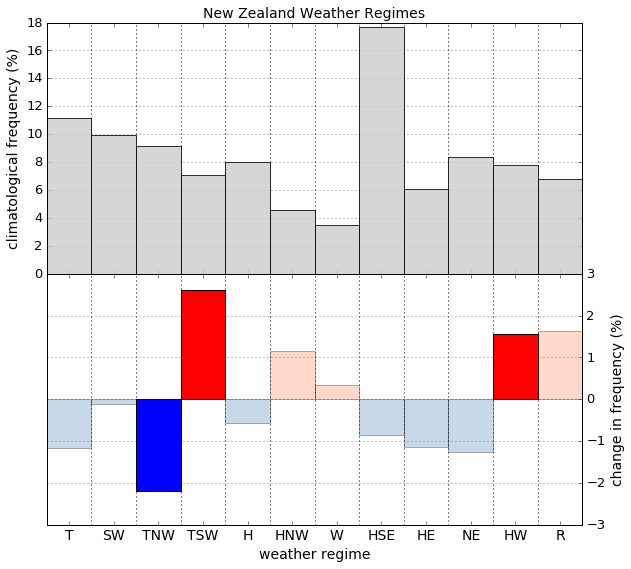

In [10]:
f = w.plot_bar(sig=1)

In [11]:
f.savefig('/Users/nicolasf/Desktop/proxy.png')

#### WR frequency changes associated with the analog years for the SW Pacific regimes  = `SW Pacific`

In [12]:
w = WR(p, classification='SW Pacific')

#### plots the bar plot, significance level = 99%

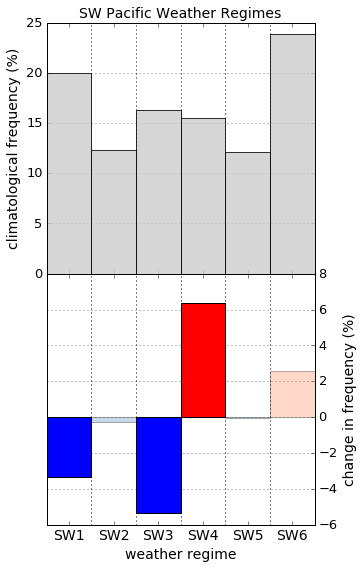

In [13]:
f = w.plot_bar(sig=1)

this is consistent with the known relationships between the SW Pacific regimes and the large-scale SST anomalies: 
i.e. the SW#4 is strongly positively correlated to a `La Niña` pattern in the ERSST / SST (see e.g. the `proxy.ipynb` notebook), and here we show that warm anomalies in Rarotonga are related to increased probability of the SW Pacific regime #4. On the other hand, SW#1 and SW#3 see their probability reduced, consistent with their positive correlation with `El Niño` patterns.

In [14]:
w.df_probs

,Rarotonga,10,90,5,95,1,99
SW1,0.166403,0.184562,0.225067,0.180722,0.231181,0.170038,0.241502
SW2,0.120444,0.105846,0.136034,0.101643,0.140619,0.095147,0.146737
SW3,0.109350,0.142147,0.181888,0.136779,0.188766,0.127998,0.198323
SW4,0.218700,0.136798,0.171227,0.132958,0.176920,0.123802,0.187245
SW5,0.120444,0.108903,0.139855,0.105063,0.144058,0.098582,0.153611
SW6,0.264659,0.210929,0.257547,0.205560,0.262916,0.196385,0.278563


### now passing an `ensemble` object 

In [15]:
ens = ensemble(djsons=djsons, pjsons=pjsons, season='DJF')

In [16]:
classification = 'SW Pacific'

In [17]:
w = WR(ens, classification=classification)

In [18]:
w.parent.description

'ensemble'

In [19]:
w.climatology

[1981, 2010]

In [20]:
w.probs_anomalies(kind='many')

In [21]:
w.df_anoms

,Amedee,Avoca,Boundary Stream Tarn,Browning Creek,Cameron,Caples,Cass,Clarke,Crow,Crow Glacier,...,Hunter,Jollie,Mistake,Oroko,Pear Drop,Pyke,Rarotonga,Taramakau,Temple,Turnbull
SW1,0.012353,-0.007863,0.044253,-0.032725,-0.025819,0.034544,0.053610,0.042866,-0.020294,0.032375,...,-0.032262,-0.011747,-0.014513,-0.002065,-0.032725,0.032835,-0.033450,-0.025819,-0.003448,-0.024438
SW2,-0.009283,-0.008374,0.039260,-0.029092,-0.020804,-0.002349,-0.006671,-0.013444,-0.012517,-0.014010,...,-0.010826,-0.027579,-0.023429,-0.002682,-0.029092,0.001639,-0.002571,-0.020804,-0.030345,-0.022186
SW3,0.001120,-0.032707,-0.022458,-0.000939,-0.007845,-0.019684,-0.058663,-0.026619,-0.011989,-0.053537,...,-0.014342,0.022797,0.003434,-0.051891,-0.000939,-0.037888,-0.053191,-0.007845,0.014499,-0.006464
SW4,0.021360,-0.016662,0.019973,-0.024950,-0.016662,0.000556,0.003111,0.000556,-0.015281,0.033210,...,0.007266,-0.060731,-0.042751,0.009808,-0.024950,0.026657,0.063917,-0.016662,-0.051049,-0.033237
SW5,-0.001889,0.039054,-0.042110,0.059772,0.054247,0.011981,-0.017289,-0.018532,0.059772,0.041550,...,0.011797,0.050340,0.040658,0.028210,0.059772,-0.010364,-0.000724,0.054247,0.050340,0.050103
SW6,-0.023661,0.026553,-0.038918,0.027934,0.016884,-0.025048,0.025902,0.015174,0.000310,-0.039588,...,0.038368,0.026920,0.036601,0.018621,0.027934,-0.012879,0.026019,0.016884,0.020004,0.036221


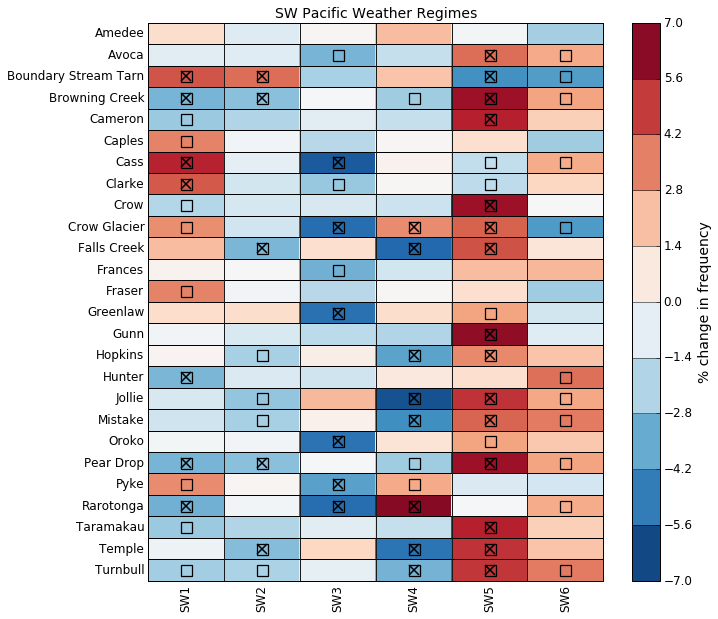

In [22]:
f = w.plot_heatmap()

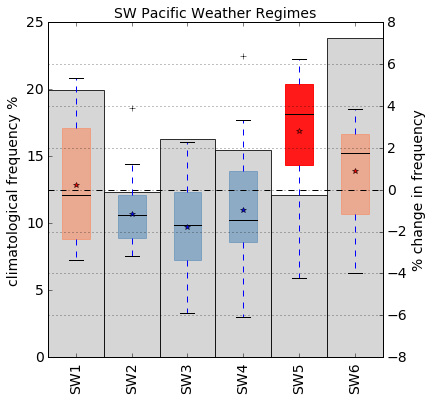

In [23]:
f = w.plot_bar()

In [24]:
w.df_anoms.to_csv('/Users/nicolasf/Desktop/table.csv')

In [25]:
w.df_probs_MC

,10,90,5,95,1,99
SW1,0.184562,0.225067,0.180722,0.231181,0.170038,0.241502
SW2,0.105846,0.136034,0.101643,0.140619,0.095147,0.146737
SW3,0.142147,0.181888,0.136779,0.188766,0.127998,0.198323
SW4,0.136798,0.171227,0.132958,0.176920,0.123802,0.187245
SW5,0.108903,0.139855,0.105063,0.144058,0.098582,0.153611
SW6,0.210929,0.257547,0.205560,0.262916,0.196385,0.278563
